# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
df = pd.read_csv('SINASC_RO_2019.csv')
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


## Verificando informações do dataframe, corrigindo tipos e valores ausentes

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

In [20]:
def stats_dados_faltantes(df: pd.DataFrame) -> None: #definindo função para verificarmos estatisticas dos dados faltantes

  stats_dados_faltantes = [] #criando uma lista com informações dos dados faltantes
  for col in df.columns: #chama cada coluna do dataframe para analise
    if df[col].isna().any(): #se a coluna em analise possuir dados vazios (retorno = True), executa os códigos abaixo
      qtd, _ = df[df[col].isna()].shape #define a variavel qtd que é igual a quantidade de dados vazios dentro da coluna
      total, _ = df.shape #define a variavel total que é igual a quantidade de linhas dos dataframe
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}} #cria dicionarios da coluna com quantidade de dados faltantes e sua porcentagem salvas
      stats_dados_faltantes.append(dict_dados_faltantes) #adiciona os dicionarios criados na lista criada inicialmente

  for stat in stats_dados_faltantes:
    print(stat)

Criei uma função para verificar os dados ausentes. 

In [21]:
stats_dados_faltantes(df=df)

{'CODESTAB': {'quantidade': 115, 'porcentagem': 0.43}}
{'ESTCIVMAE': {'quantidade': 317, 'porcentagem': 1.17}}
{'ESCMAE': {'quantidade': 312, 'porcentagem': 1.15}}
{'CODOCUPMAE': {'quantidade': 2907, 'porcentagem': 10.76}}
{'QTDFILVIVO': {'quantidade': 1573, 'porcentagem': 5.82}}
{'QTDFILMORT': {'quantidade': 2098, 'porcentagem': 7.76}}
{'GESTACAO': {'quantidade': 1232, 'porcentagem': 4.56}}
{'GRAVIDEZ': {'quantidade': 79, 'porcentagem': 0.29}}
{'PARTO': {'quantidade': 49, 'porcentagem': 0.18}}
{'HORANASC': {'quantidade': 21, 'porcentagem': 0.08}}
{'SEXO': {'quantidade': 4, 'porcentagem': 0.01}}
{'APGAR1': {'quantidade': 96, 'porcentagem': 0.36}}
{'APGAR5': {'quantidade': 103, 'porcentagem': 0.38}}
{'RACACOR': {'quantidade': 647, 'porcentagem': 2.39}}
{'IDANOMAL': {'quantidade': 591, 'porcentagem': 2.19}}
{'CODANOMAL': {'quantidade': 26814, 'porcentagem': 99.21}}
{'DTRECORIGA': {'quantidade': 27028, 'porcentagem': 100.0}}
{'NATURALMAE': {'quantidade': 298, 'porcentagem': 1.1}}
{'CODMUN

Abaixo vou usar uma função lambda para organizar esses dados ausentes

In [40]:
dados_ausentes_desordenados = [
{'CODESTAB': {'quantidade': 115, 'porcentagem': 0.43}},
{'ESTCIVMAE': {'quantidade': 317, 'porcentagem': 1.17}},
{'ESCMAE': {'quantidade': 312, 'porcentagem': 1.15}},
{'CODOCUPMAE': {'quantidade': 2907, 'porcentagem': 10.76}},
{'QTDFILVIVO': {'quantidade': 1573, 'porcentagem': 5.82}},
{'QTDFILMORT': {'quantidade': 2098, 'porcentagem': 7.76}},
{'GESTACAO': {'quantidade': 1232, 'porcentagem': 4.56}},
{'GRAVIDEZ': {'quantidade': 79, 'porcentagem': 0.29}},
{'PARTO': {'quantidade': 49, 'porcentagem': 0.18}},
{'HORANASC': {'quantidade': 21, 'porcentagem': 0.08}},
{'SEXO': {'quantidade': 4, 'porcentagem': 0.01}},
{'APGAR1': {'quantidade': 96, 'porcentagem': 0.36}},
{'APGAR5': {'quantidade': 103, 'porcentagem': 0.38}},
{'RACACOR': {'quantidade': 647, 'porcentagem': 2.39}},
{'IDANOMAL': {'quantidade': 591, 'porcentagem': 2.19}},
{'CODANOMAL': {'quantidade': 26814, 'porcentagem': 99.21}},
{'DTRECORIGA': {'quantidade': 27028, 'porcentagem': 100.0}},
{'NATURALMAE': {'quantidade': 298, 'porcentagem': 1.1}},
{'CODMUNNATU': {'quantidade': 298, 'porcentagem': 1.1}},
{'CODUFNATU': {'quantidade': 298, 'porcentagem': 1.1}},
{'ESCMAE2010': {'quantidade': 249, 'porcentagem': 0.92}},
{'SERIESCMAE': {'quantidade': 12710, 'porcentagem': 47.03}},
{'DTNASCMAE': {'quantidade': 40, 'porcentagem': 0.15}},
{'RACACORMAE': {'quantidade': 661, 'porcentagem': 2.45}},
{'QTDGESTANT': {'quantidade': 1212, 'porcentagem': 4.48}},
{'QTDPARTNOR': {'quantidade': 1879, 'porcentagem': 6.95}},
{'QTDPARTCES': {'quantidade': 1791, 'porcentagem': 6.63}},
{'IDADEPAI': {'quantidade': 19421, 'porcentagem': 71.86}},
{'DTULTMENST': {'quantidade': 10072, 'porcentagem': 37.27}},
{'SEMAGESTAC': {'quantidade': 1238, 'porcentagem': 4.58}},
{'TPMETESTIM': {'quantidade': 1238, 'porcentagem': 4.58}},
{'CONSPRENAT': {'quantidade': 930, 'porcentagem': 3.44}},
{'MESPRENAT': {'quantidade': 2867, 'porcentagem': 10.61}},
{'TPAPRESENT': {'quantidade': 265, 'porcentagem': 0.98}},
{'STTRABPART': {'quantidade': 947, 'porcentagem': 3.5}},
{'STCESPARTO': {'quantidade': 747, 'porcentagem': 2.76}},
{'TPNASCASSI': {'quantidade': 61, 'porcentagem': 0.23}},
{'TPFUNCRESP': {'quantidade': 67, 'porcentagem': 0.25}},
{'TPDOCRESP': {'quantidade': 14, 'porcentagem': 0.05}},
{'DTDECLARAC': {'quantidade': 52, 'porcentagem': 0.19}},
{'ESCMAEAGR1': {'quantidade': 249, 'porcentagem': 0.92}},
{'munResLat': {'quantidade': 1, 'porcentagem': 0.0}},
{'munResLon': {'quantidade': 1, 'porcentagem': 0.0}},
{'munResAlt': {'quantidade': 1, 'porcentagem': 0.0}},
{'munResArea': {'quantidade': 1, 'porcentagem': 0.0}},
]

sorted(dados_ausentes_desordenados, key=lambda x: list(x.values())[0]['porcentagem'])

[{'munResLat': {'quantidade': 1, 'porcentagem': 0.0}},
 {'munResLon': {'quantidade': 1, 'porcentagem': 0.0}},
 {'munResAlt': {'quantidade': 1, 'porcentagem': 0.0}},
 {'munResArea': {'quantidade': 1, 'porcentagem': 0.0}},
 {'SEXO': {'quantidade': 4, 'porcentagem': 0.01}},
 {'TPDOCRESP': {'quantidade': 14, 'porcentagem': 0.05}},
 {'HORANASC': {'quantidade': 21, 'porcentagem': 0.08}},
 {'DTNASCMAE': {'quantidade': 40, 'porcentagem': 0.15}},
 {'PARTO': {'quantidade': 49, 'porcentagem': 0.18}},
 {'DTDECLARAC': {'quantidade': 52, 'porcentagem': 0.19}},
 {'TPNASCASSI': {'quantidade': 61, 'porcentagem': 0.23}},
 {'TPFUNCRESP': {'quantidade': 67, 'porcentagem': 0.25}},
 {'GRAVIDEZ': {'quantidade': 79, 'porcentagem': 0.29}},
 {'APGAR1': {'quantidade': 96, 'porcentagem': 0.36}},
 {'APGAR5': {'quantidade': 103, 'porcentagem': 0.38}},
 {'CODESTAB': {'quantidade': 115, 'porcentagem': 0.43}},
 {'ESCMAE2010': {'quantidade': 249, 'porcentagem': 0.92}},
 {'ESCMAEAGR1': {'quantidade': 249, 'porcentagem':

### Verificando colunas com muitos dados ausentes e entendendo do que se trata

Para auxiliar nesta tarefa, vou resgatar o dicionário de variáveis que coloquei na parte 1.

**Dicionário de Variáveis**

| Variável        | Significado                                               |
|-----------------|-----------------------------------------------------------|
| ORIGEM          | Banco de dados de Origem 1- Oracle, 2- FTP, 3- SEAD                                              |
| CODESTAB        | Código de estabelecimento                                 |
| CODMUNNASC      | Município de ocorrência do nascimento                     |
| LOCNASC         | Local de ocorrência do nascimento                         |
| IDADEMAE        | Idade da mãe em anos                                      |
| ESTCIVMAE       | Estado civil da mãe                                       |
| ESCMAE          | Escolaridade da mãe                                       |
| CODOCUPMAE      | Ocupação da mãe                                           |
| QTDFILVIVO      | Número de filhos vivos                                    |
| QTDFILMORT      | Número de filhos mortos                                   |
| CODMUNRES       | Município de residência da mãe                            |
| GESTACAO        | Semanas de gestação                                       |
| GRAVIDEZ        | Tipo de gravidez                                          |
| PARTO           | Tipo de parto                                             |
| CONSULTAS       | Número de consultas de pré-natal                          |
| DTNASC          | Data do nascimento                                        |
| HORANASC        | Horário de nascimento                                      |
| SEXO            | Sexo do recém-nascido                                     |
| APGAR1          | Apgar no primeiro minuto                                   |
| APGAR5          | Apgar no quinto minuto                                    |
| RACACOR         | Raça/Cor                                                  |
| PESO            | Peso ao nascer                                            |
| IDANOMAL        | Anomalia congênita                                        |
| DTCADASTRO      | Data do cadastro da Declaração de Nascido Vivo (DN)       |
| CODANOMAL       | Código de malformação congênita ou anomalia cromossômica  |
| NUMEROLOTE      | Número do lote                                            |
| VERSAOSIST      | Versão do sistema                                         |
| DTRECEBIM       | Data de recebimento no nível central                      |
| DIFDATA         | Diferença entre a data de óbito e a data do recebimento original da DO  |
| DTRECORIGA      | Data do primeiro recebimento do lote                       |
| NATURALMAE      | Código do país de nascimento da mãe                        |
| CODMUNNATU      | Código do município de naturalidade da mãe                |
| CODUFNATU       | Código da UF de naturalidade da mãe                       |
| ESCMAE2010      | Escolaridade da mãe em 2010                               |
| SERIESCMAE      | Série escolar da mãe                                      |
| DTNASCMAE       | Data de nascimento da mãe                                 |
| RACACORMAE      | Raça/cor da mãe                                           |
| QTDGESTANT      | Número de gestações anteriores                            |
| QTDPARTNOR      | Número de partos vaginais                                 |
| QTDPARTCES      | Número de partos cesáreos                                 |
| IDADEPAI        | Idade do pai                                              |
| DTULTMENST      | Data da última menstruação (DUM)                          |
| SEMAGESTAC      | Número de semanas de gestação                             |
| TPMETESTIM      | Método utilizado                                          |
| CONSPRENAT      | Número de consultas pré-natal                              |
| MESPRENAT       | Mês de gestação em que iniciou o pré-natal                 |
| TPAPRESENT      | Tipo de apresentação do recém-nascido                      |
| STTRABPART      | Trabalho de parto induzido                                |
| STCESPARTO      | Cesárea ocorreu antes do trabalho de parto iniciar        |
| TPNASCASSI      | Nascimento foi assistido por                               |
| TPFUNCRESP      | Tipo de função do responsável pelo preenchimento           |
| TPDOCRESP       | Tipo do documento do responsável                           |
| DTDECLARAC      | Data da declaração                                        |
| ESCMAEAGR1      | Escolaridade 2010 agregada                                 |
| STDNEPIDEM      | Status de DO Epidemiológica                                |
| STDNNOVA        | Status de DO Nova                                          |
| CODPAISRES      | Código do país de residência                               |
| TPROBSON        | Código do Grupo de Robson                                  |
| PARIDADE        | Define se é a primeira gravidez ou se teve mais de uma. 1 – Multípara; 0- Nulípara                                           |
| KOTELCHUCK      | índice de Kotelchuck - Avaliação da assistência pré-nata                                             |
| CONTADOR        | Número identificador do registro                                              |
| munResStatus    | Sem descrição                                             |
| munResTipo      | Sem descrição                                             |
| munResNome      | Nome do Munícipio de Residência                                           |
| munResUf        | Sem descrição                                             |
| munResLat       | Latitude do Municipio de Residencia                       |
| munResLon       | Longitude do Municipio de Residencia                      |
| munResAlt       | Altitude do Municipio de Residencia                       |
| munResArea      | Área do Municipio de Residencia                           |


In [7]:
df.CODANOMAL.info #código de malformação congênita ou anomalia cromossômica, de acordo com a CID-10

<bound method Series.info of 0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
27023    NaN
27024    NaN
27025    NaN
27026    NaN
27027    NaN
Name: CODANOMAL, Length: 27028, dtype: object>

In [7]:
df.ESTCIVMAE.info #não posso subsituir este valor pela media já que não é uma soma e sim uma descritiva (estado civil)

<bound method Series.info of 0        5.0
1        2.0
2        9.0
3        5.0
4        2.0
        ... 
27023    2.0
27024    1.0
27025    2.0
27026    2.0
27027    5.0
Name: ESTCIVMAE, Length: 27028, dtype: float64>

In [8]:
df['IDADEPAI'].isna().sum()

19421

In [9]:
df['IDADEPAI'].isna().sum() / len(df['IDADEPAI']) * 100 #porcentagem de valores ausentes na coluna IDADEPAI

71.85511321592422

Optei por manter os dados faltantes e trata-los a medida que for necessário conforme o caso de cada variável. Tomei essa escolha pois mesmos os dados ausentes podem contar histórias, como no caso da ausência de 71,85% da coluna IDADEPAI, que pode indicar uma falta de registro do pai das crianças.

A medida que necessário nos exercícios irei separar dataframes com as variáveis de interesse e realizar o devido tratamento a medida que necessário.

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

Escolhi analisar as variaveis IDADEPAI e IDADEMAE ao longo do exercício. Acredito a principal razão (mas talvez não a única) da ausência de dados da idade dos pai seja justamente o não registro do pai, ou seja, uma ausência paterna. Também irei analisar a idade das mães afim de traçar um perfil e buscar alguma relação entre idade da mãe e ausência da idade do pai.

In [10]:
df['munResLat']

0       -11.93554
1       -11.93554
2       -11.93554
3       -12.13178
4       -11.93554
           ...   
27023   -12.74137
27024   -12.55684
27025   -12.74137
27026   -12.74137
27027   -11.70974
Name: munResLat, Length: 27028, dtype: float64

In [11]:
df['munResLat'].isna().sum() / len(df['munResLat']) * 100 #porcentagem de valores ausentes na coluna

0.003699866804795027

In [13]:
df['munResLat'].fillna(method='ffill', inplace=True) #Trocando valores ausentes pelo valor anterior.

Escolhi trocar pelo valor anterior e não pela média, pois para a latitude acredito que essa abordagem se aproxime mais da realidade do que trocar todos pela média, uma vez que trocando todos pela média seria como se "vários" municipios estivessem no mesmo local. Neste caso, o número de dados ausentes é mínimo, mas penso no impacto que poderia causar com mais dados ausentes.

In [14]:
df['munResLat'].isna().sum() / len(df['munResLat']) * 100 #porcentagem de valores ausentes na coluna

0.0

In [15]:
# Criando faixas de Latitude
df['FaixaLat'] = pd.cut(df['munResLat'], bins=[-float('inf'), -10.5, float('inf')],
                                         labels=['Abaixo de -10.5', 'Acima de -10.5'])

# Aplicar o groupby e calcular as operações para cada faixa de latitude
resultado = df.groupby('FaixaLat')[['IDADEPAI', 'IDADEMAE']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

# Exibir o resultado
resultado

IDADEPAI                                                     \
                      sum       mean   min   max median       std        var   
FaixaLat                                                                       
Abaixo de -10.5  198482.0  30.901759  15.0  86.0   30.0  7.707202  59.400967   
Acima de -10.5    38038.0  32.126689  16.0  73.0   31.0  8.034214  64.548602   

                IDADEMAE                                                 
                     sum       mean min max median       std        var  
FaixaLat                                                                 
Abaixo de -10.5   340167  26.178775  12  53   26.0  6.320171  39.944563  
Acima de -10.5    365094  26.014964  11  52   25.0  6.447663  41.572355

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [16]:
df['munResArea']

0         7067.025
1         7067.025
2         7067.025
3         3958.273
4         7067.025
           ...    
27023    11518.915
27024     5126.723
27025    11518.915
27026    11518.915
27027      843.446
Name: munResArea, Length: 27028, dtype: float64

In [17]:
df['munResArea'].isna().sum() / len(df['munResArea']) * 100 #porcentagem de valores ausentes na coluna

0.003699866804795027

In [67]:
# Criar as faixas de Área
df['FaixaArea'] = pd.cut(df['munResArea'], bins=[-float('inf'), 3000, float('inf')],
                                           labels=['Abaixo de 3000', 'Acima de 3000'])

# Aplicar o groupby e calcular as operações para cada faixa de área
resultado = df.groupby('FaixaArea')[['IDADEPAI', 'IDADEMAE']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

# Exibir o resultado
resultado

IDADEPAI                                                     \
                     sum       mean   min   max median       std        var   
FaixaArea                                                                     
Abaixo de 3000   78074.0  31.092792  16.0  69.0   30.0  7.675474  58.912900   
Acima de 3000   158424.0  31.094014  15.0  86.0   30.0  7.818364  61.126809   

               IDADEMAE                                                 
                    sum       mean min max median       std        var  
FaixaArea                                                               
Abaixo de 3000   137389  26.324775  11  53   26.0  6.305535  39.759775  
Acima de 3000    567848  26.038518  12  53   25.0  6.405497  41.030387

In [17]:
#Fim do Exercício 2

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [19]:
# Criar faixas na variável 'munResAlt'
df['FaixaAltitude'] = pd.cut(df['munResAlt'], bins=[-float('inf'), 500, 1000, 1500, float('inf')],
                                              labels=['<500', '500-1000', '1000-1500', '>1500'])

# Aplicar o groupby e calcular as operações para cada faixa de altitude
resultado = df.groupby('FaixaAltitude')[['IDADEPAI', 'IDADEMAE']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

resultado

IDADEPAI                                                     \
                    sum       mean   min   max median       std        var   
FaixaAltitude                                                                
<500           230692.0  31.023669  15.0  86.0   30.0  7.777849  60.494934   
500-1000         5806.0  34.152941  18.0  60.0   34.0  6.812807  46.414340   
1000-1500           0.0        NaN   NaN   NaN    NaN       NaN        NaN   
>1500               0.0        NaN   NaN   NaN    NaN       NaN        NaN   

              IDADEMAE                                                     
                   sum       mean   min   max median       std        var  
FaixaAltitude                                                              
<500            663207  26.072532  11.0  53.0   25.0  6.391458  40.850730  
500-1000         42030  26.433962  14.0  46.0   26.0  6.310937  39.827921  
1000-1500            0        NaN   NaN   NaN    NaN       NaN        NaN  
>1500                0        NaN   NaN   NaN    NaN       NaN        NaN

Nas faixas de altitude abaixo de 500 a tendência é que a idade dos pais e mães seja menor que nas regiões acima de 500.

In [22]:
df['FaixaAltitude'].isna().sum() / len(df['munResArea']) * 100 #porcentagem de valores ausentes na coluna

0.003699866804795027

In [23]:
#Fim do Exercício 3

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [40]:
#criando um novo dataframe para o exercicio
df_1 = df[['munResNome', 'IDADEMAE', 'DTNASC']]
df_1

,munResNome,IDADEMAE,DTNASC
0,Alta Floresta D'Oeste,19,2019-02-19
1,Alta Floresta D'Oeste,29,2019-02-21
2,Alta Floresta D'Oeste,37,2019-02-25
3,Alto Alegre dos Parecis,30,2019-03-20
4,Alta Floresta D'Oeste,30,2019-03-23
...,...,...,...
27023,Vilhena,32,2019-12-13
27024,Chupinguaia,19,2019-10-04
27025,Vilhena,24,2019-08-02
27026,Vilhena,21,2019-12-23


In [41]:
print(dados_faltantes(df=df_1))

None


**Show! Não há dados ausentes nestas colunas. Com esse novo dataframe faremos algumas analises a seguir**

In [42]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   munResNome  27028 non-null  object
 1   IDADEMAE    27028 non-null  int64 
 2   DTNASC      27028 non-null  object
dtypes: int64(1), object(2)
memory usage: 633.6+ KB


A coluna DTNASC está em object, é preciso convertê-la para *datetime*

In [43]:
# Convertendo a coluna de data para o formato datetime
df_1['DTNASC'] = pd.to_datetime(df_1['DTNASC'], errors='coerce')
df_1.DTNASC

#Essas modificações não afentarão o dataframe original 'df'

C:\Users\Administrador\AppData\Local\Temp\ipykernel_7924\1565681276.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['DTNASC'] = pd.to_datetime(df_1['DTNASC'], errors='coerce')


0       2019-02-19
1       2019-02-21
2       2019-02-25
3       2019-03-20
4       2019-03-23
           ...    
27023   2019-12-13
27024   2019-10-04
27025   2019-08-02
27026   2019-12-23
27027   2019-12-27
Name: DTNASC, Length: 27028, dtype: datetime64[ns]

In [44]:
# Importando dados adicionais
dados_ro = pd.read_csv('dados_extras_ro.csv', sep=';', encoding='latin_1') #dados extras para mapping
regioes_map = dict(zip(dados_ro['municipio'], dados_ro['regiao'])) #Dicionário de regiões para mapping

In [45]:
dados_ro

,municipio,regiao,idh,ifdm,pib
0,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000
1,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410
2,Alto Paraíso,Ariquemes,0.625,0.5735,358000
3,Alvorada D'Oeste,Ji-Paraná,0.643,0.5919,204098
4,Ariquemes,Ariquemes,0.702,0.7746,2579830
5,Buritis,Ariquemes,0.616,0.6199,726000
6,Cabixi,Vilhena,0.650,0.5887,113031
7,Cacaulândia,Ariquemes,0.646,0.5721,116635
8,Cacoal,Cacoal,0.718,0.7111,2261644
9,Campo Novo de Rondônia,Ariquemes,0.593,0.5272,208821


In [46]:
regioes_map

{"Alta Floresta D'Oeste": 'Cacoal',
 'Alto Alegre dos Parecis': 'Cacoal',
 'Alto Paraíso': 'Ariquemes',
 "Alvorada D'Oeste": 'Ji-Paraná',
 'Ariquemes': 'Ariquemes',
 'Buritis': 'Ariquemes',
 'Cabixi': 'Vilhena',
 'Cacaulândia': 'Ariquemes',
 'Cacoal': 'Cacoal',
 'Campo Novo de Rondônia': 'Ariquemes',
 'Candeias do Jamari': 'Porto Velho',
 'Castanheiras': 'Cacoal',
 'Cerejeiras': 'Vilhena',
 'Chupinguaia': 'Vilhena',
 'Colorado do Oeste': 'Vilhena',
 'Corumbiara': 'Vilhena',
 'Costa Marques': 'Ji-Paraná',
 'Cujubim': 'Ariquemes',
 "Espigão D'Oeste": 'Cacoal',
 'Governador Jorge Teixeira': 'Jaru',
 'Guajará-Mirim': 'Porto Velho',
 'Itapuã do Oeste': 'Porto Velho',
 'Jaru': 'Jaru',
 'Ji-Paraná': 'Ji-Paraná',
 "Machadinho D'Oeste": 'Jaru',
 'Ministro Andreazza': 'Cacoal',
 'Mirante da Serra': 'Ji-Paraná',
 'Monte Negro': 'Ariquemes',
 "Nova Brasilândia D'Oeste": 'Cacoal',
 'Nova Mamoré': 'Porto Velho',
 'Nova União': 'Ji-Paraná',
 'Novo Horizonte do Oeste': 'Cacoal',
 'Ouro Preto do Oeste'

In [47]:
# Usando a coluna 'munResNome' para adicionar a coluna região usando os municipios como referencia
df_1['RegiaoImediata'] = df_1['munResNome'].map(regioes_map)
df_1

C:\Users\Administrador\AppData\Local\Temp\ipykernel_7924\3396829582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['RegiaoImediata'] = df_1['munResNome'].map(regioes_map)


,munResNome,IDADEMAE,DTNASC,RegiaoImediata
0,Alta Floresta D'Oeste,19,2019-02-19,Cacoal
1,Alta Floresta D'Oeste,29,2019-02-21,Cacoal
2,Alta Floresta D'Oeste,37,2019-02-25,Cacoal
3,Alto Alegre dos Parecis,30,2019-03-20,Cacoal
4,Alta Floresta D'Oeste,30,2019-03-23,Cacoal
...,...,...,...,...
27023,Vilhena,32,2019-12-13,Vilhena
27024,Chupinguaia,19,2019-10-04,Vilhena
27025,Vilhena,24,2019-08-02,Vilhena
27026,Vilhena,21,2019-12-23,Vilhena


In [48]:
# Extraindo o ano e o mês da coluna de data
df_1['MesNascimento'] = df_1['DTNASC'].dt.to_period('M')
df_1

C:\Users\Administrador\AppData\Local\Temp\ipykernel_7924\1692129653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['MesNascimento'] = df_1['DTNASC'].dt.to_period('M')


,munResNome,IDADEMAE,DTNASC,RegiaoImediata,MesNascimento
0,Alta Floresta D'Oeste,19,2019-02-19,Cacoal,2019-02
1,Alta Floresta D'Oeste,29,2019-02-21,Cacoal,2019-02
2,Alta Floresta D'Oeste,37,2019-02-25,Cacoal,2019-02
3,Alto Alegre dos Parecis,30,2019-03-20,Cacoal,2019-03
4,Alta Floresta D'Oeste,30,2019-03-23,Cacoal,2019-03
...,...,...,...,...,...
27023,Vilhena,32,2019-12-13,Vilhena,2019-12
27024,Chupinguaia,19,2019-10-04,Vilhena,2019-10
27025,Vilhena,24,2019-08-02,Vilhena,2019-08
27026,Vilhena,21,2019-12-23,Vilhena,2019-12


In [49]:
# Calculando a média da idade das mães para cada região imediata e mês
media_idade_mae_por_regiao_mes = df_1.groupby(['RegiaoImediata', 'MesNascimento'])['IDADEMAE'].mean()
media_idade_mae_por_regiao_mes

RegiaoImediata  MesNascimento
Ariquemes       2019-01          24.866412
                2019-02          25.316239
                2019-03          25.288660
                2019-04          25.411972
                2019-05          25.410256
                                   ...    
Vilhena         2019-08          26.297436
                2019-09          26.407407
                2019-10          26.161435
                2019-11          26.169725
                2019-12          27.010753
Name: IDADEMAE, Length: 72, dtype: float64

In [50]:
# O metodo .unstack 'desempilha' os dados, tornando-os uma tabela e não uma lista corrida
media_idade_mae_por_regiao_mes = media_idade_mae_por_regiao_mes.unstack('RegiaoImediata')
media_idade_mae_por_regiao_mes #visualizando a diferença de organização depois de desempilhar com .unstack

RegiaoImediata,Ariquemes,Cacoal,Jaru,Ji-Paraná,Porto Velho,Vilhena
MesNascimento,,,,,,
2019-01,24.866412,26.350543,26.086667,25.792056,26.017668,26.665049
2019-02,25.316239,25.969444,25.586777,26.417949,26.215000,26.781818
2019-03,25.288660,26.319410,26.215686,25.490364,26.347207,26.386667
2019-04,25.411972,26.235149,25.291667,26.075862,26.172336,26.686099
2019-05,25.410256,26.031008,25.187050,25.931264,25.830470,25.586207
2019-06,26.652510,25.845333,26.055944,26.272727,26.421628,26.526627
2019-07,24.973783,26.780488,24.611111,25.809399,26.139903,26.373057
2019-08,25.684615,26.539106,25.864865,25.938144,26.070588,26.297436
2019-09,25.561644,26.779126,25.748299,25.640177,25.966435,26.407407


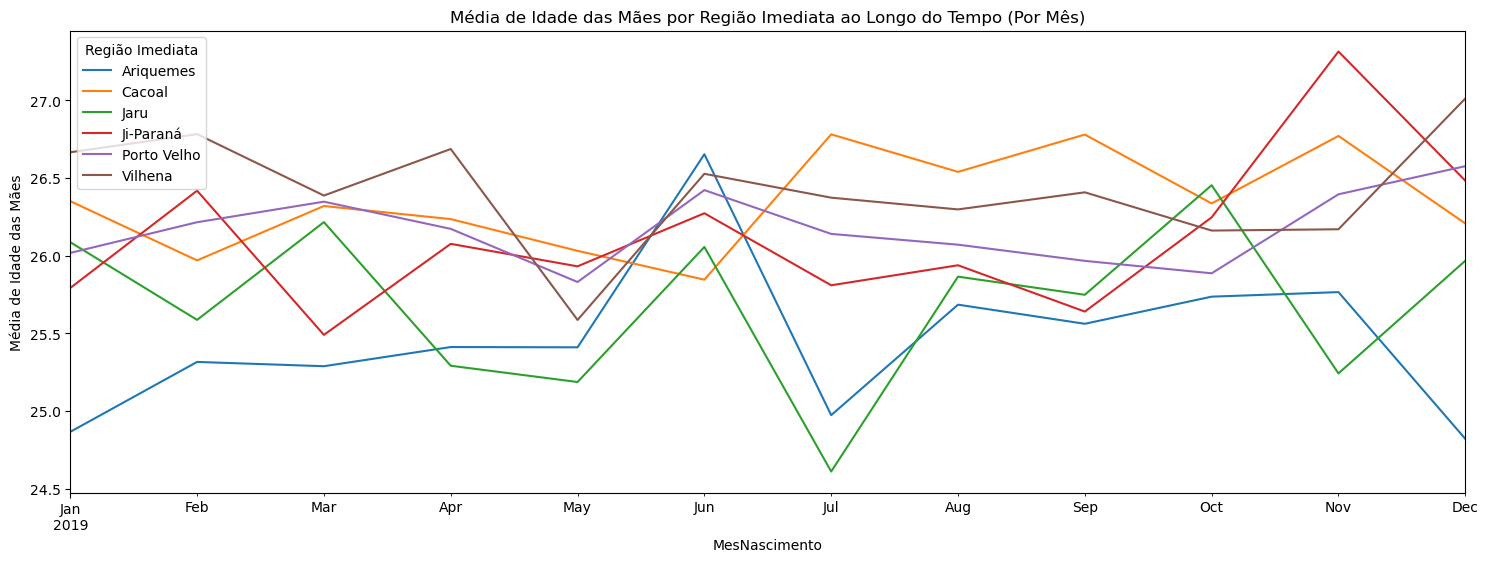

In [51]:
# Plotando o gráfico de linhas
media_idade_mae_por_regiao_mes.plot(figsize=[18, 6])
plt.ylabel('Média de Idade das Mães')
plt.title('Média de Idade das Mães por Região Imediata ao Longo do Tempo (Por Mês)')
plt.legend(title='Região Imediata')
plt.show()

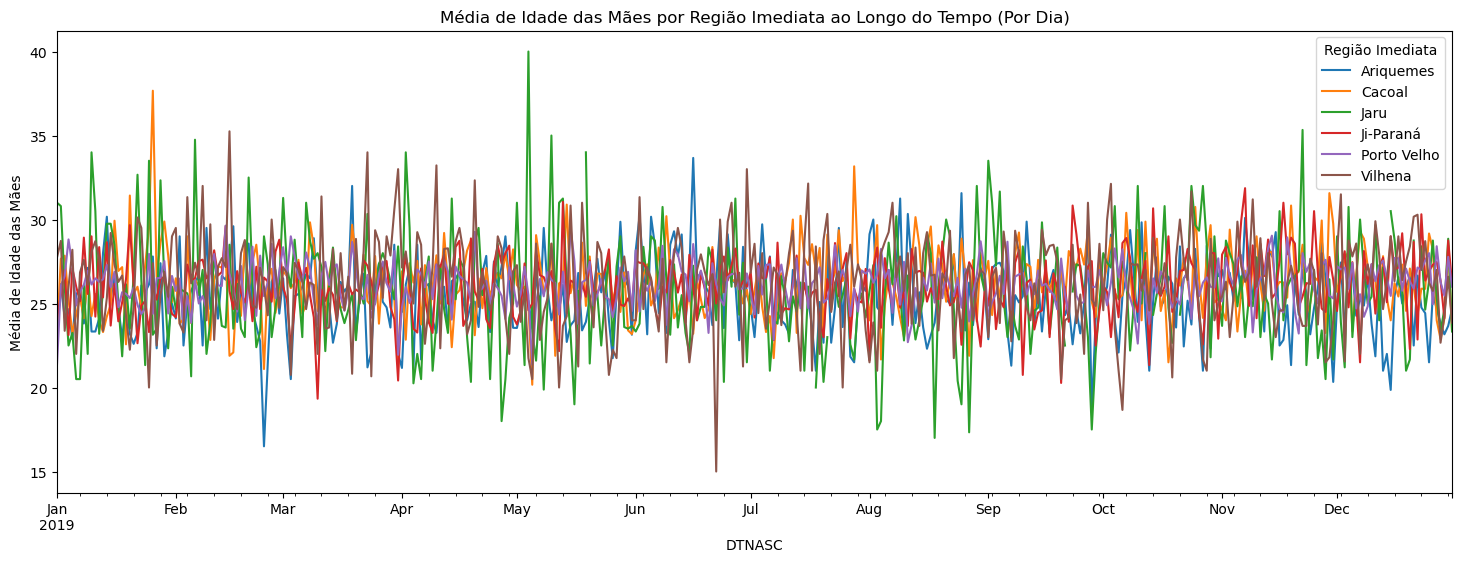

In [52]:
# Calculando a média da idade das mães para cada região imediata e dia
media_idade_mae_por_regiao_mes = df_1.groupby(['RegiaoImediata', 'DTNASC'])['IDADEMAE'].mean()

# Reorganizando os dados para facilitar o gráfico
media_idade_mae_por_regiao_mes = media_idade_mae_por_regiao_mes.unstack('RegiaoImediata')

# Plotando o gráfico de linhas
media_idade_mae_por_regiao_mes.plot(figsize=[18, 6])
plt.ylabel('Média de Idade das Mães')
plt.title('Média de Idade das Mães por Região Imediata ao Longo do Tempo (Por Dia)')
plt.legend(title='Região Imediata')
plt.show()

Quando agrupamos a média em dias, podemos notar que existem mães com 15 anos. Já quando agrupamos por mês, a média de idade mais jovem exibida é 24,5. Isso acontece pela diferença de agrupamentos (quando agrupamos por mês são 12 agrupamentos, já por dia são 365, o que nos dá uma visão mais ampla). Isso me levantou a curiosidade de qual é o real número de mães com 15 anos ou menos e qual a idade mínima das mães. Outra curiosidade é como essas mães jovens podem ter sua escolaridade prejudicada e também se há alguma relação entre mãe mais jovens e ausência dos dados de IDADEPAI.

In [53]:
df['IDADEMAE'].min()

11

In [54]:
df['IDADEMAE'].value_counts()[df['IDADEMAE'].min()]

1

In [55]:
df['IDADEMAE'].max()

53

In [56]:
df['IDADEMAE'].value_counts()[df['IDADEMAE'].max()]

2

Vamos criar faixas para agrupar a idade das mães, talvez isso ajude a visualizar melhor alguma informação. Resolvi criar uma faixa de mães com 17 anos ou menos, já que esta a idade esperada para se concluir o ensino médio. Teorizo que este grupo de mães mais jovens possivelmente acabem tendo sua escolaridade prejudicada.

In [62]:
# Bins e Labels
bins = [0, 17, 22, 27, 32, 38, 43, 48, 52, 56]
labels = ['Até 17 anos', '18 a 22 anos', '23 a 27 anos', '28 a 32 anos', '33 a 37 anos',
          '38 a 42 anos', '43 a 47 anos', '48 a 51 anos', '52 ou mais']

# Adicionar a coluna de FaixaIdade ao dataframe
df_1['FaixaIdade'] = pd.cut(df_1['IDADEMAE'], bins=bins, labels=labels, include_lowest=True)
df_1

C:\Users\Administrador\AppData\Local\Temp\ipykernel_7924\3626630722.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['FaixaIdade'] = pd.cut(df_1['IDADEMAE'], bins=bins, labels=labels, include_lowest=True)


,munResNome,IDADEMAE,DTNASC,RegiaoImediata,MesNascimento,FaixaIdade
0,Alta Floresta D'Oeste,19,2019-02-19,Cacoal,2019-02,18 a 22 anos
1,Alta Floresta D'Oeste,29,2019-02-21,Cacoal,2019-02,28 a 32 anos
2,Alta Floresta D'Oeste,37,2019-02-25,Cacoal,2019-02,33 a 37 anos
3,Alto Alegre dos Parecis,30,2019-03-20,Cacoal,2019-03,28 a 32 anos
4,Alta Floresta D'Oeste,30,2019-03-23,Cacoal,2019-03,28 a 32 anos
...,...,...,...,...,...,...
27023,Vilhena,32,2019-12-13,Vilhena,2019-12,28 a 32 anos
27024,Chupinguaia,19,2019-10-04,Vilhena,2019-10,18 a 22 anos
27025,Vilhena,24,2019-08-02,Vilhena,2019-08,23 a 27 anos
27026,Vilhena,21,2019-12-23,Vilhena,2019-12,18 a 22 anos


In [63]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   munResNome      27028 non-null  object        
 1   IDADEMAE        27028 non-null  int64         
 2   DTNASC          27028 non-null  datetime64[ns]
 3   RegiaoImediata  27027 non-null  object        
 4   MesNascimento   27028 non-null  period[M]     
 5   FaixaIdade      27028 non-null  category      
dtypes: category(1), datetime64[ns](1), int64(1), object(2), period[M](1)
memory usage: 1.1+ MB


In [64]:
df_1['FaixaIdade'].value_counts()

FaixaIdade
23 a 27 anos    7462
18 a 22 anos    6809
28 a 32 anos    5850
33 a 37 anos    3935
Até 17 anos     2097
38 a 42 anos     818
43 a 47 anos      53
48 a 51 anos       2
52 ou mais         2
Name: count, dtype: int64

In [65]:
faixa_idade_counts = df_1['FaixaIdade'].value_counts()

# Calculando a proporção em porcentagem
faixa_idade_percent = (faixa_idade_counts / faixa_idade_counts.sum()) * 100

# Exiba o resultado
faixa_idade_percent

FaixaIdade
23 a 27 anos    27.608406
18 a 22 anos    25.192393
28 a 32 anos    21.644221
33 a 37 anos    14.558976
Até 17 anos      7.758621
38 a 42 anos     3.026491
43 a 47 anos     0.196093
48 a 51 anos     0.007400
52 ou mais       0.007400
Name: count, dtype: float64

In [66]:
df_2 = df_1[df_1['FaixaIdade'] == 'Até 17 anos'].copy()
df_2 #criando um dataframe apenas com as maes até 16 anos

,munResNome,IDADEMAE,DTNASC,RegiaoImediata,MesNascimento,FaixaIdade
44,Alta Floresta D'Oeste,14,2019-05-28,Cacoal,2019-05,Até 17 anos
49,Alta Floresta D'Oeste,17,2019-05-02,Cacoal,2019-05,Até 17 anos
54,Alta Floresta D'Oeste,16,2019-05-21,Cacoal,2019-05,Até 17 anos
111,Cujubim,17,2019-01-21,Ariquemes,2019-01,Até 17 anos
118,Ariquemes,16,2019-01-08,Ariquemes,2019-01,Até 17 anos
...,...,...,...,...,...,...
26939,Porto Velho,17,2019-11-26,Porto Velho,2019-11,Até 17 anos
26957,Porto Velho,16,2019-12-11,Porto Velho,2019-12,Até 17 anos
26959,Porto Velho,17,2019-12-17,Porto Velho,2019-12,Até 17 anos
26960,Porto Velho,16,2019-12-18,Porto Velho,2019-12,Até 17 anos


In [68]:
df_2['ESCMAE'] = df['ESCMAE']
df_2

,munResNome,IDADEMAE,DTNASC,RegiaoImediata,MesNascimento,FaixaIdade,ESCMAE
44,Alta Floresta D'Oeste,14,2019-05-28,Cacoal,2019-05,Até 17 anos,4 a 7 anos
49,Alta Floresta D'Oeste,17,2019-05-02,Cacoal,2019-05,Até 17 anos,4 a 7 anos
54,Alta Floresta D'Oeste,16,2019-05-21,Cacoal,2019-05,Até 17 anos,4 a 7 anos
111,Cujubim,17,2019-01-21,Ariquemes,2019-01,Até 17 anos,12 anos ou mais
118,Ariquemes,16,2019-01-08,Ariquemes,2019-01,Até 17 anos,1 a 3 anos
...,...,...,...,...,...,...,...
26939,Porto Velho,17,2019-11-26,Porto Velho,2019-11,Até 17 anos,4 a 7 anos
26957,Porto Velho,16,2019-12-11,Porto Velho,2019-12,Até 17 anos,4 a 7 anos
26959,Porto Velho,17,2019-12-17,Porto Velho,2019-12,Até 17 anos,4 a 7 anos
26960,Porto Velho,16,2019-12-18,Porto Velho,2019-12,Até 17 anos,4 a 7 anos


In [69]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2097 entries, 44 to 26985
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   munResNome      2097 non-null   object        
 1   IDADEMAE        2097 non-null   int64         
 2   DTNASC          2097 non-null   datetime64[ns]
 3   RegiaoImediata  2097 non-null   object        
 4   MesNascimento   2097 non-null   period[M]     
 5   FaixaIdade      2097 non-null   category      
 6   ESCMAE          2077 non-null   object        
dtypes: category(1), datetime64[ns](1), int64(1), object(3), period[M](1)
memory usage: 117.1+ KB


In [72]:
porcentagem_escmae_df_2 = df_2['ESCMAE'].value_counts(normalize=True) * 100

print(porcentagem_escmae_df_2)

ESCMAE
8 a 11 anos        58.594126
4 a 7 anos         38.998556
1 a 3 anos          1.974001
12 anos ou mais     0.385171
Nenhuma             0.048146
Name: proportion, dtype: float64


In [75]:
38.998556 + 1.974001 + 0.048146

41.020703000000005

In [73]:
porcentagem_escmae = df['ESCMAE'].value_counts(normalize=True) * 100

print(porcentagem_escmae)

ESCMAE
8 a 11 anos        58.515496
12 anos ou mais    21.586315
4 a 7 anos         17.817038
1 a 3 anos          1.931427
Nenhuma             0.149723
Name: proportion, dtype: float64


In [76]:
17.817038 + 1.931427 + 0.149723

19.898188

A escolaridade de 8 a 11 anos é predominante, independente da idade da mãe (essa escolaridade indica algo entre ensino fundamental e/ou médio completo). Porém, quando continuamos verificando, vemos que que enquanto apenas 0,3% das mães com menos de 17 anos possuem 12 anos ou mais de escolaridade (possivelmente um ensino superior), esse número é muito maior no para os dados completos.

Além disso, entre as mães com menos de 17 anos a escolaridade menor que 7 anos é de cerca de 41%, enquanto para os dados gerais essa mesma faixa de escolaridade é de 19,89%. Embora já fosse esperado, os dados confirmam que a maternidade em idade escolar pode ser prejudicial ao desenvolvimento escolar dessas mães.

In [77]:
df_2['IDADEPAI'] = df['IDADEPAI']
df_2

,munResNome,IDADEMAE,DTNASC,RegiaoImediata,MesNascimento,FaixaIdade,ESCMAE,IDADEPAI
44,Alta Floresta D'Oeste,14,2019-05-28,Cacoal,2019-05,Até 17 anos,4 a 7 anos,35.0
49,Alta Floresta D'Oeste,17,2019-05-02,Cacoal,2019-05,Até 17 anos,4 a 7 anos,21.0
54,Alta Floresta D'Oeste,16,2019-05-21,Cacoal,2019-05,Até 17 anos,4 a 7 anos,NaN
111,Cujubim,17,2019-01-21,Ariquemes,2019-01,Até 17 anos,12 anos ou mais,NaN
118,Ariquemes,16,2019-01-08,Ariquemes,2019-01,Até 17 anos,1 a 3 anos,NaN
...,...,...,...,...,...,...,...,...
26939,Porto Velho,17,2019-11-26,Porto Velho,2019-11,Até 17 anos,4 a 7 anos,NaN
26957,Porto Velho,16,2019-12-11,Porto Velho,2019-12,Até 17 anos,4 a 7 anos,NaN
26959,Porto Velho,17,2019-12-17,Porto Velho,2019-12,Até 17 anos,4 a 7 anos,21.0
26960,Porto Velho,16,2019-12-18,Porto Velho,2019-12,Até 17 anos,4 a 7 anos,NaN


In [80]:
df['IDADEPAI'].isna().sum()

19421

In [82]:
df['IDADEPAI'].isna().sum() / len(df) * 100

71.85511321592422

In [78]:
df_2['IDADEPAI'].isna().sum()

1668

In [79]:
df_2['IDADEPAI'].isna().sum() / len(df_2) * 100

79.54220314735336

Basta alguns cálculos simples de porcentagem para ver que a proporção de ausência nos dados de IDADEPAI é maior entre as mães com menos de 17 anos. Sendo 79% para este grupo e 71% para o conjunto completo. Se a ausência dos dados de IDADEPAI realmente indicam uma ausência paterna, garotas jovens estão mais propensas a este risco, além dos desafios de menor escolaridade.

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


In [83]:
dados_ro

,municipio,regiao,idh,ifdm,pib
0,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000
1,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410
2,Alto Paraíso,Ariquemes,0.625,0.5735,358000
3,Alvorada D'Oeste,Ji-Paraná,0.643,0.5919,204098
4,Ariquemes,Ariquemes,0.702,0.7746,2579830
5,Buritis,Ariquemes,0.616,0.6199,726000
6,Cabixi,Vilhena,0.650,0.5887,113031
7,Cacaulândia,Ariquemes,0.646,0.5721,116635
8,Cacoal,Cacoal,0.718,0.7111,2261644
9,Campo Novo de Rondônia,Ariquemes,0.593,0.5272,208821


In [84]:
#Criando variaveis para para mapping usando dados_ro

idh = dict(zip(dados_ro['municipio'], dados_ro['idh']))
ifdm = dict(zip(dados_ro['municipio'], dados_ro['ifdm']))
pib = dict(zip(dados_ro['municipio'], dados_ro['pib']))

### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [177]:
idh

{"Alta Floresta D'Oeste": 0.641,
 'Alto Alegre dos Parecis': 0.592,
 'Alto Paraíso': 0.625,
 "Alvorada D'Oeste": 0.643,
 'Ariquemes': 0.702,
 'Buritis': 0.616,
 'Cabixi': 0.65,
 'Cacaulândia': 0.646,
 'Cacoal': 0.718,
 'Campo Novo de Rondônia': 0.593,
 'Candeias do Jamari': 0.649,
 'Castanheiras': 0.658,
 'Cerejeiras': 0.692,
 'Chupinguaia': 0.652,
 'Colorado do Oeste': 0.685,
 'Corumbiara': 0.613,
 'Costa Marques': 0.611,
 'Cujubim': 0.612,
 "Espigão D'Oeste": 0.672,
 'Governador Jorge Teixeira': 0.596,
 'Guajará-Mirim': 0.657,
 'Itapuã do Oeste': 0.614,
 'Jaru': 0.689,
 'Ji-Paraná': 0.714,
 "Machadinho D'Oeste": 0.596,
 'Ministro Andreazza': 0.638,
 'Mirante da Serra': 0.643,
 'Monte Negro': 0.607,
 "Nova Brasilândia D'Oeste": 0.643,
 'Nova Mamoré': 0.587,
 'Nova União': 0.587,
 'Novo Horizonte do Oeste': 0.634,
 'Ouro Preto do Oeste': 0.682,
 'Parecis': 0.617,
 'Pimenta Bueno': 0.71,
 'Pimenteiras do Oeste': 0.665,
 'Porto Velho': 0.736,
 'Presidente Médici': 0.664,
 'Primavera de R

In [85]:
df_1

,munResNome,IDADEMAE,DTNASC,RegiaoImediata,MesNascimento,FaixaIdade
0,Alta Floresta D'Oeste,19,2019-02-19,Cacoal,2019-02,18 a 22 anos
1,Alta Floresta D'Oeste,29,2019-02-21,Cacoal,2019-02,28 a 32 anos
2,Alta Floresta D'Oeste,37,2019-02-25,Cacoal,2019-02,33 a 37 anos
3,Alto Alegre dos Parecis,30,2019-03-20,Cacoal,2019-03,28 a 32 anos
4,Alta Floresta D'Oeste,30,2019-03-23,Cacoal,2019-03,28 a 32 anos
...,...,...,...,...,...,...
27023,Vilhena,32,2019-12-13,Vilhena,2019-12,28 a 32 anos
27024,Chupinguaia,19,2019-10-04,Vilhena,2019-10,18 a 22 anos
27025,Vilhena,24,2019-08-02,Vilhena,2019-08,23 a 27 anos
27026,Vilhena,21,2019-12-23,Vilhena,2019-12,18 a 22 anos


In [87]:
# Criando uma nova coluna 'IDH' com base nas faixas
df_1['IDH'] = df_1['munResNome'].map(idh)
df_1

C:\Users\Administrador\AppData\Local\Temp\ipykernel_7924\3904182690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['IDH'] = df_1['munResNome'].map(idh)


,munResNome,IDADEMAE,DTNASC,RegiaoImediata,MesNascimento,FaixaIdade,IDH
0,Alta Floresta D'Oeste,19,2019-02-19,Cacoal,2019-02,18 a 22 anos,0.641
1,Alta Floresta D'Oeste,29,2019-02-21,Cacoal,2019-02,28 a 32 anos,0.641
2,Alta Floresta D'Oeste,37,2019-02-25,Cacoal,2019-02,33 a 37 anos,0.641
3,Alto Alegre dos Parecis,30,2019-03-20,Cacoal,2019-03,28 a 32 anos,0.592
4,Alta Floresta D'Oeste,30,2019-03-23,Cacoal,2019-03,28 a 32 anos,0.641
...,...,...,...,...,...,...,...
27023,Vilhena,32,2019-12-13,Vilhena,2019-12,28 a 32 anos,0.731
27024,Chupinguaia,19,2019-10-04,Vilhena,2019-10,18 a 22 anos,0.652
27025,Vilhena,24,2019-08-02,Vilhena,2019-08,23 a 27 anos,0.731
27026,Vilhena,21,2019-12-23,Vilhena,2019-12,18 a 22 anos,0.731


In [88]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   munResNome      27028 non-null  object        
 1   IDADEMAE        27028 non-null  int64         
 2   DTNASC          27028 non-null  datetime64[ns]
 3   RegiaoImediata  27027 non-null  object        
 4   MesNascimento   27028 non-null  period[M]     
 5   FaixaIdade      27028 non-null  category      
 6   IDH             27027 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), object(2), period[M](1)
memory usage: 1.3+ MB


In [89]:
bins = [0, 0.5, 0.6, 0.7, 0.8, 1.0]  
labels = ['IDH muito baixo', 'IDH baixo', 'IDH médio', 'IDH alto', 'IDH muito alto']

# Adicionar a coluna de faixas ao dataframe
df_1['IDH_Faixa'] = pd.cut(df_1['IDH'], bins=bins, labels=labels, include_lowest=True)
df_1

C:\Users\Administrador\AppData\Local\Temp\ipykernel_7924\830705670.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['IDH_Faixa'] = pd.cut(df_1['IDH'], bins=bins, labels=labels, include_lowest=True)


,munResNome,IDADEMAE,DTNASC,RegiaoImediata,MesNascimento,FaixaIdade,IDH,IDH_Faixa
0,Alta Floresta D'Oeste,19,2019-02-19,Cacoal,2019-02,18 a 22 anos,0.641,IDH médio
1,Alta Floresta D'Oeste,29,2019-02-21,Cacoal,2019-02,28 a 32 anos,0.641,IDH médio
2,Alta Floresta D'Oeste,37,2019-02-25,Cacoal,2019-02,33 a 37 anos,0.641,IDH médio
3,Alto Alegre dos Parecis,30,2019-03-20,Cacoal,2019-03,28 a 32 anos,0.592,IDH baixo
4,Alta Floresta D'Oeste,30,2019-03-23,Cacoal,2019-03,28 a 32 anos,0.641,IDH médio
...,...,...,...,...,...,...,...,...
27023,Vilhena,32,2019-12-13,Vilhena,2019-12,28 a 32 anos,0.731,IDH alto
27024,Chupinguaia,19,2019-10-04,Vilhena,2019-10,18 a 22 anos,0.652,IDH médio
27025,Vilhena,24,2019-08-02,Vilhena,2019-08,23 a 27 anos,0.731,IDH alto
27026,Vilhena,21,2019-12-23,Vilhena,2019-12,18 a 22 anos,0.731,IDH alto


In [91]:
# Agrupar por faixas de IDH
agrupado_idh = df_1.groupby('IDH_Faixa')

# Exibir informações estatísticas para cada faixa
for group, data in agrupado_idh:
    print(f"\nFaixa: {group}")
    print(data[['munResNome', 'IDH']])


Faixa: IDH muito baixo
Empty DataFrame
Columns: [munResNome, IDH]
Index: []

Faixa: IDH baixo
                    munResNome    IDH
3      Alto Alegre dos Parecis  0.592
23     Alto Alegre dos Parecis  0.592
24     Alto Alegre dos Parecis  0.592
90     Alto Alegre dos Parecis  0.592
105    Alto Alegre dos Parecis  0.592
...                        ...    ...
26811             Seringueiras  0.598
26812             Seringueiras  0.598
26813             Seringueiras  0.598
26814             Seringueiras  0.598
26815             Seringueiras  0.598

[1826 rows x 2 columns]

Faixa: IDH médio
                    munResNome    IDH
0        Alta Floresta D'Oeste  0.641
1        Alta Floresta D'Oeste  0.641
2        Alta Floresta D'Oeste  0.641
4        Alta Floresta D'Oeste  0.641
5        Alta Floresta D'Oeste  0.641
...                        ...    ...
26997      Ouro Preto do Oeste  0.682
27003        Colorado do Oeste  0.685
27021        Colorado do Oeste  0.685
27024              Chuping

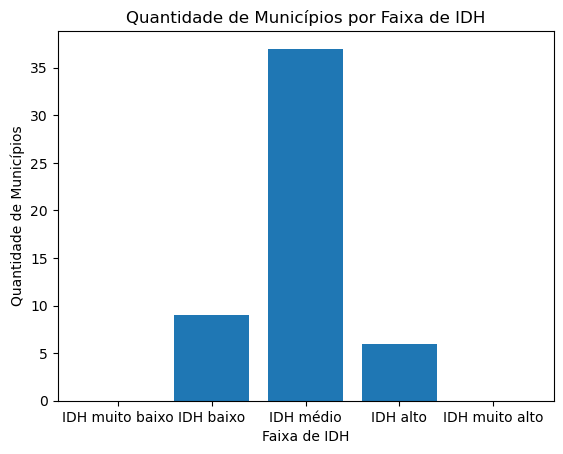

In [95]:
# Conta a quantidade de municípios em cada faixa de IDH
contagem_por_faixa = df_1.groupby('IDH_Faixa')['munResNome'].nunique()

# Cria o gráfico de barras
plt.bar(contagem_por_faixa.index, contagem_por_faixa)

# Adiciona rótulos e título ao gráfico
plt.xlabel('Faixa de IDH')
plt.ylabel('Quantidade de Municípios')
plt.title('Quantidade de Municípios por Faixa de IDH')

# Exibe o gráfico
plt.show()

A maioria dos municipios estão na faixa de IDH média. A faixa de IDH alto e baixo possuem valores próximos, mas o IDH alto ainda é menor. Em geral, a maioria dos municipios de Rondonia possui um bom IDH **(se considerarmos como bom medio ou maior).**

**Vamos verificar a faixa de idade dentro de cada faixa de IDH**

In [97]:
df_1['ESCMAE'] = df['ESCMAE']
df_1

C:\Users\Administrador\AppData\Local\Temp\ipykernel_7924\1936803622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['ESCMAE'] = df['ESCMAE']


,munResNome,IDADEMAE,DTNASC,RegiaoImediata,MesNascimento,FaixaIdade,IDH,IDH_Faixa,ESCMAE
0,Alta Floresta D'Oeste,19,2019-02-19,Cacoal,2019-02,18 a 22 anos,0.641,IDH médio,8 a 11 anos
1,Alta Floresta D'Oeste,29,2019-02-21,Cacoal,2019-02,28 a 32 anos,0.641,IDH médio,8 a 11 anos
2,Alta Floresta D'Oeste,37,2019-02-25,Cacoal,2019-02,33 a 37 anos,0.641,IDH médio,8 a 11 anos
3,Alto Alegre dos Parecis,30,2019-03-20,Cacoal,2019-03,28 a 32 anos,0.592,IDH baixo,12 anos ou mais
4,Alta Floresta D'Oeste,30,2019-03-23,Cacoal,2019-03,28 a 32 anos,0.641,IDH médio,8 a 11 anos
...,...,...,...,...,...,...,...,...,...
27023,Vilhena,32,2019-12-13,Vilhena,2019-12,28 a 32 anos,0.731,IDH alto,12 anos ou mais
27024,Chupinguaia,19,2019-10-04,Vilhena,2019-10,18 a 22 anos,0.652,IDH médio,8 a 11 anos
27025,Vilhena,24,2019-08-02,Vilhena,2019-08,23 a 27 anos,0.731,IDH alto,8 a 11 anos
27026,Vilhena,21,2019-12-23,Vilhena,2019-12,18 a 22 anos,0.731,IDH alto,8 a 11 anos


In [98]:
# Definir as faixas de idade e IDH
faixas_idade = df_1['FaixaIdade']
faixas_idh = df_1['IDH_Faixa']

# Calcular as porcentagens utilizando groupby e pivot_table
df_porcentagens = df_1.groupby(['IDH_Faixa', 'FaixaIdade']).size().unstack(fill_value=0)
df_porcentagens = df_porcentagens.div(df_porcentagens.sum(axis=1), axis=0) * 100

# Exibir o DataFrame com as porcentagens
df_porcentagens

FaixaIdade,Até 17 anos,18 a 22 anos,23 a 27 anos,28 a 32 anos,33 a 37 anos,38 a 42 anos,43 a 47 anos,48 a 51 anos,52 ou mais
IDH_Faixa,,,,,,,,,
IDH muito baixo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IDH baixo,9.419496,27.875137,28.587076,19.277108,12.431544,2.245345,0.164294,0.000000,0.000000
IDH médio,7.839965,25.892376,27.876631,21.352313,13.943708,2.868543,0.183328,0.021568,0.021568
IDH alto,7.521346,24.478905,27.335510,22.086891,15.161979,3.208187,0.207182,0.000000,0.000000
IDH muito alto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
# Calcular as porcentagens por região imediata e faixa de idade
df_porcentagens_regiao = df_1.groupby(['RegiaoImediata', 'FaixaIdade']).size().unstack(fill_value=0)
df_porcentagens_regiao = df_porcentagens_regiao.div(df_porcentagens_regiao.sum(axis=1), axis=0) * 100

# Exibir o DataFrame com as porcentagens por região imediata
df_porcentagens_regiao

FaixaIdade,Até 17 anos,18 a 22 anos,23 a 27 anos,28 a 32 anos,33 a 37 anos,38 a 42 anos,43 a 47 anos,48 a 51 anos,52 ou mais
RegiaoImediata,,,,,,,,,
Ariquemes,8.196721,27.806990,29.137024,20.043303,12.434272,2.319827,0.061862,0.000000,0.000000
Cacoal,6.713013,24.331957,28.112101,23.137085,14.490550,2.932870,0.238975,0.021725,0.021725
Jaru,8.259061,26.916221,28.758170,19.429590,14.141414,2.257873,0.237671,0.000000,0.000000
Ji-Paraná,7.396211,25.191455,27.771060,22.410318,14.147521,2.821443,0.241838,0.020153,0.000000
Porto Velho,8.339937,24.940571,26.485737,21.236133,15.243661,3.545959,0.208003,0.000000,0.000000
Vilhena,7.142857,23.224490,28.122449,22.612245,15.795918,2.938776,0.122449,0.000000,0.040816


A Região de Porto Velho concentra a maior parte dos registros de mães com menos de 17 anos. Seguido bem de perto por Jaru e Ariquemes

In [108]:
# Filtrar o DataFrame para incluir apenas a região imediata 'Porto Velho'
df_porto_velho = df_1[df_1['RegiaoImediata'] == 'Porto Velho']

# Calcular a média do IDH
idh_medio_porto_velho = df_porto_velho['IDH'].mean()

# Exibir o IDH médio da região imediata 'Porto Velho'
print(f'O IDH médio da região imediata "Porto Velho" é: {idh_medio_porto_velho}')

O IDH médio da região imediata "Porto Velho" é: 0.719291996830428


In [109]:
# Filtrar o DataFrame para incluir apenas a região imediata 'Porto Velho'
df_porto_velho = df_1[df_1['RegiaoImediata'] == 'Porto Velho']

# Encontrar a faixa de IDH predominante
faixa_idh_predominante = df_porto_velho['IDH_Faixa'].mode().iloc[0]

# Exibir a faixa de IDH predominante em Porto Velho
print(f'A faixa de IDH predominante em Porto Velho é: {faixa_idh_predominante}')

A faixa de IDH predominante em Porto Velho é: IDH alto


In [197]:
# Calcular o valor médio de IDH para cada região imediata
df_media_idh_por_regiao = df_1.groupby('RegiaoImediata')['IDH'].mean().reset_index()

# Organizar as regiões imediatas com base no valor médio de IDH (do maior para o menor)
df_media_idh_por_regiao = df_media_idh_por_regiao.sort_values(by='IDH', ascending=False)

# Exibir as regiões imediatas organizadas pelo valor médio de IDH
print(df_media_idh_por_regiao)

  RegiaoImediata       IDH
4    Porto Velho  0.719292
5        Vilhena  0.708147
1         Cacoal  0.687008
3      Ji-Paraná  0.673101
0      Ariquemes  0.661747
2           Jaru  0.643616


Embora Porto Velho tenha a maior média de IDH, ela também tem a maior média de mães com menos de 17 anos.
Em seguida, os locais com maiores números de mães com menos de 17 anos são Jaru e Ariquemes, que possuem os menores IDHs.

In [199]:
# Calcular a média de idade das mães por região imediata
media_idade_mae_por_regiao = df_1.groupby('RegiaoImediata')['IDADEMAE'].mean().reset_index()

# Exibir a média de idade das mães por região imediata
media_idade_mae_por_regiao

,RegiaoImediata,IDADEMAE
0,Ariquemes,25.459635
1,Cacoal,26.347817
2,Jaru,25.708853
3,Ji-Paraná,26.094720
4,Porto Velho,26.166303
5,Vilhena,26.417143


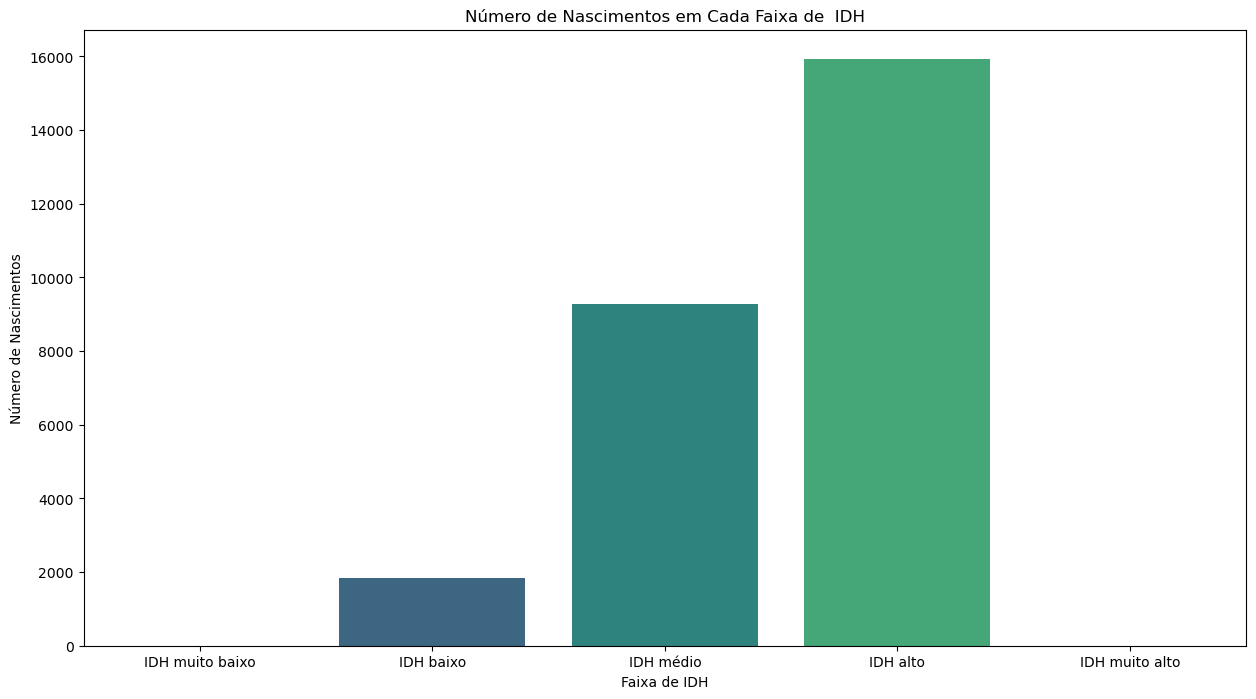

In [90]:
# Plotar o número de nascimentos em cada faixa de IDH-M
plt.figure(figsize=(15, 8))
sns.countplot(x='IDH_Faixa', data=df_1, palette='viridis')
plt.title('Número de Nascimentos em Cada Faixa de  IDH')
plt.xlabel('Faixa de IDH')
plt.ylabel('Número de Nascimentos')
plt.show()

In [115]:
# Agrupa o DataFrame por 'IDH_Faixa' e conta a quantidade de registros em cada faixa
contagem_por_faixa = df_1.groupby('IDH_Faixa').size()

# Calcula a diferença entre 'baixo' e 'médio' em relação à faixa 'alto'
diferenca_baixo_medio_vs_alto = contagem_por_faixa.loc['IDH alto'] - contagem_por_faixa.loc[['IDH baixo', 'IDH médio']].sum()

# Imprime o resultado
print(f"Diferença entre a quantidade de registros nas faixas 'baixo' e 'médio' em relação à faixa 'alto': {diferenca_baixo_medio_vs_alto}")

Diferença entre a quantidade de registros nas faixas 'baixo' e 'médio' em relação à faixa 'alto': 4829


In [98]:
contagem_por_faixa.loc[['IDH baixo', 'IDH médio']].sum()

11099

In [99]:
contagem_por_faixa.loc['IDH alto']

15928

In [203]:
# Agrupa o DataFrame por 'IDH_Faixa' e conta a quantidade de registros em cada faixa
contagem_por_faixa = df_1.groupby('IDH_Faixa').size()

# Calcula a porcentagem das faixas 'IDH baixo' e 'IDH médio' em relação ao total
porcentagem_baixo_medio = (contagem_por_faixa.loc[['IDH baixo', 'IDH médio']].sum() / contagem_por_faixa.sum()) * 100

# Calcula a porcentagem da faixa 'IDH alto' em relação ao total
porcentagem_alto = (contagem_por_faixa.loc['IDH alto'] / contagem_por_faixa.sum()) * 100

# Imprime os resultados
print(f"Porcentagem das faixas 'IDH baixo' e 'IDH médio': {porcentagem_baixo_medio:.2f}%")
print(f"Porcentagem da faixa 'IDH alto': {porcentagem_alto:.2f}%")

Porcentagem das faixas 'IDH baixo' e 'IDH médio': 41.07%
Porcentagem da faixa 'IDH alto': 58.93%


A faixa de IDH alto supera mesmo as baixo e média somado, representando quase 59% do estado.

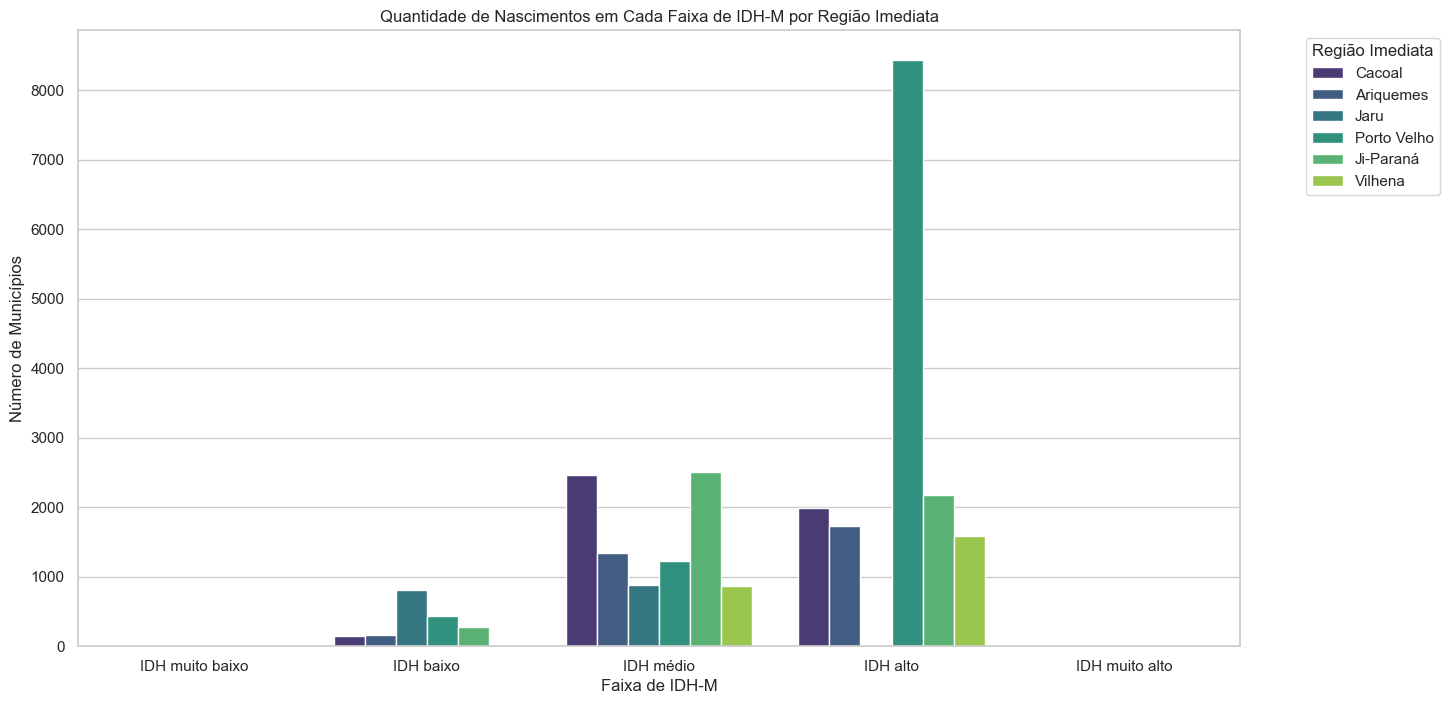

In [205]:
# Plotar o número de nascimentos em cada faixa de IDH por região imediata
plt.figure(figsize=(15, 8))
sns.countplot(x='IDH_Faixa', hue='RegiaoImediata', data=df_1, palette='viridis')
plt.title('Quantidade de Nascimentos em Cada Faixa de IDH-M por Região Imediata')
plt.xlabel('Faixa de IDH-M')
plt.ylabel('Número de Municípios')
plt.legend(title='Região Imediata', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


O IFDM é semelhante ao Índice de Desenvolvimento Humano (IDH), calculado pela ONU.[7] Uma diferença entre ambos é que os dados do IFDM “podem ser coletados todo ano”, ao passo que os do IDH só são levantados uma vez por década,[8] pois dependem de “dados do censo demográfico, realizado a cada 10 anos.”[9]

Tendo isso em mente, vamos realizar analises usando o IFDM

In [117]:
ifdm

{"Alta Floresta D'Oeste": 0.6337,
 'Alto Alegre dos Parecis': 0.5046,
 'Alto Paraíso': 0.5735,
 "Alvorada D'Oeste": 0.5919,
 'Ariquemes': 0.7746,
 'Buritis': 0.6199,
 'Cabixi': 0.5887,
 'Cacaulândia': 0.5721,
 'Cacoal': 0.7111,
 'Campo Novo de Rondônia': 0.5272,
 'Candeias do Jamari': 0.6199,
 'Castanheiras': 0.543,
 'Cerejeiras': 0.6137,
 'Chupinguaia': 0.6766,
 'Colorado do Oeste': 0.6473,
 'Corumbiara': 0.5759,
 'Costa Marques': 0.5626,
 'Cujubim': 0.5055,
 "Espigão D'Oeste": 0.5973,
 'Governador Jorge Teixeira': 0.4562,
 'Guajará-Mirim': 0.5541,
 'Itapuã do Oeste': 0.5903,
 'Jaru': 0.645,
 'Ji-Paraná': 0.7117,
 "Machadinho D'Oeste": 0.5322,
 'Ministro Andreazza': 0.5657,
 'Mirante da Serra': 0.5519,
 'Monte Negro': 0.6016,
 "Nova Brasilândia D'Oeste": 0.5857,
 'Nova Mamoré': 0.5084,
 'Nova União': 0.5571,
 'Novo Horizonte do Oeste': 0.5858,
 'Ouro Preto do Oeste': 0.6261,
 'Parecis': 0.5502,
 'Pimenta Bueno': 0.7383,
 'Pimenteiras do Oeste': 0.6501,
 'Porto Velho': 0.7257,
 'Presid

C:\Users\Administrador\AppData\Local\Temp\ipykernel_7924\2705205937.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['IFDM_Faixa'] = pd.cut(df_1['munResNome'].map(ifdm), bins=bins_ifdm, labels=labels_ifdm, include_lowest=True)


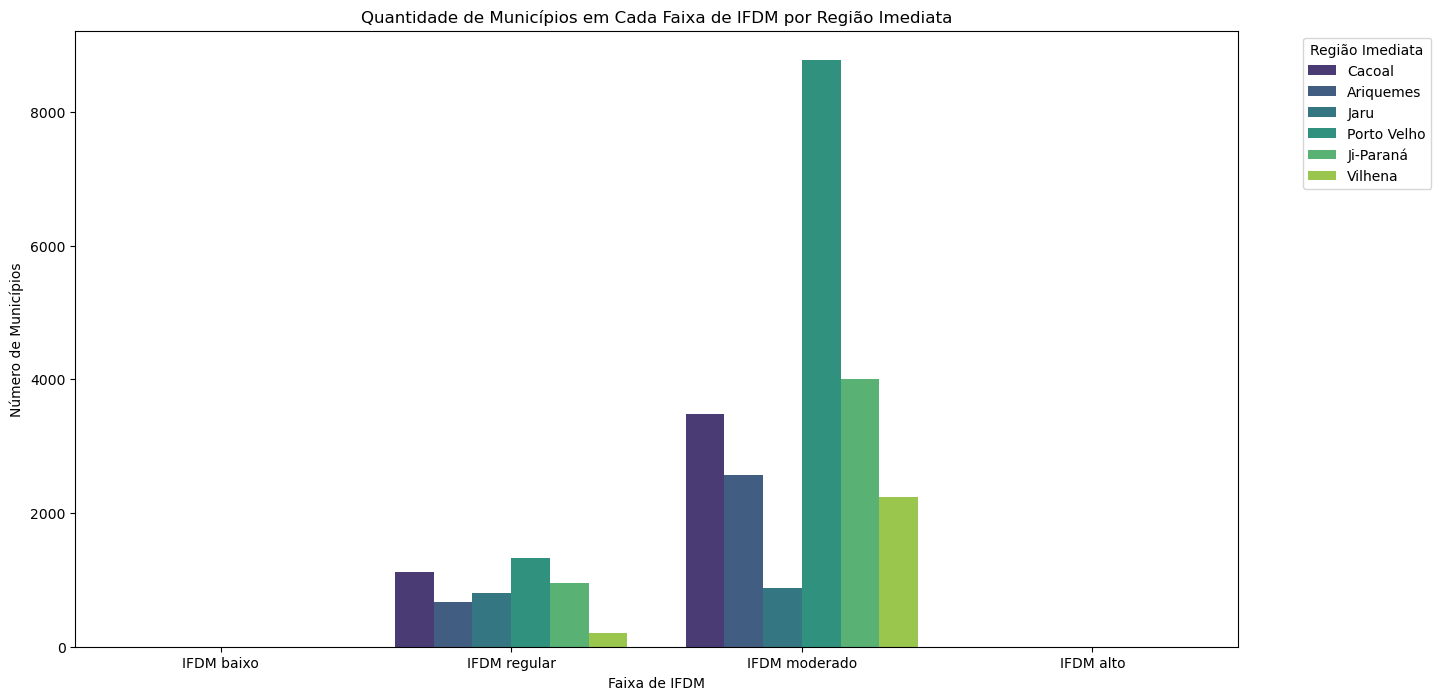

In [119]:
# Criando faixas para IFDM
bins_ifdm = [0, 0.4, 0.6, 0.8, 1] 
labels_ifdm = ['IFDM baixo', 'IFDM regular', 'IFDM moderado', 'IFDM alto']
df_1['IFDM_Faixa'] = pd.cut(df_1['munResNome'].map(ifdm), bins=bins_ifdm, labels=labels_ifdm, include_lowest=True)

# Plotando o número de municípios em cada faixa de IFDM por região imediata
plt.figure(figsize=(15, 8))
sns.countplot(x='IFDM_Faixa', hue='RegiaoImediata', data=df_1, palette='viridis')
plt.title('Quantidade de Municípios em Cada Faixa de IFDM por Região Imediata')
plt.xlabel('Faixa de IFDM')
plt.ylabel('Número de Municípios')
plt.legend(title='Região Imediata', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

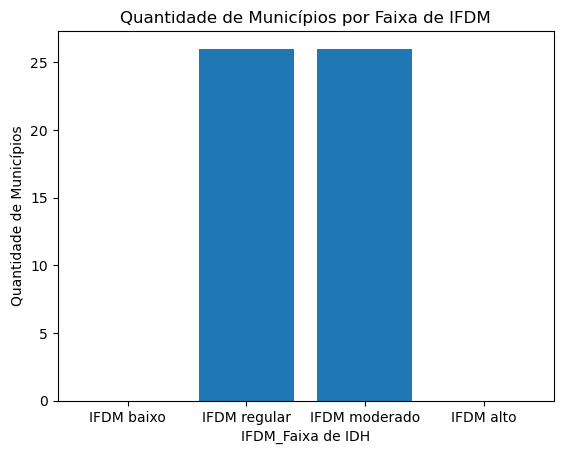

In [124]:
# Conta a quantidade de municípios em cada faixa de IFDM
contagem_por_faixa = df_1.groupby('IFDM_Faixa')['munResNome'].nunique()

# Cria o gráfico de barras
plt.bar(contagem_por_faixa.index, contagem_por_faixa)

# Adiciona rótulos e título ao gráfico
plt.xlabel('IFDM_Faixa de IDH')
plt.ylabel('Quantidade de Municípios')
plt.title('Quantidade de Municípios por Faixa de IFDM')

# Exibe o gráfico
plt.show()

In [125]:
df_1.groupby('IFDM_Faixa')['munResNome'].nunique()

IFDM_Faixa
IFDM baixo        0
IFDM regular     26
IFDM moderado    26
IFDM alto         0
Name: munResNome, dtype: int64

In [122]:
df_2['IFDM_Faixa'] = df_1['IFDM_Faixa']
df_2

,munResNome,IDADEMAE,DTNASC,RegiaoImediata,MesNascimento,FaixaIdade,ESCMAE,IDADEPAI,IFDM_Faixa
44,Alta Floresta D'Oeste,14,2019-05-28,Cacoal,2019-05,Até 17 anos,4 a 7 anos,35.0,IFDM moderado
49,Alta Floresta D'Oeste,17,2019-05-02,Cacoal,2019-05,Até 17 anos,4 a 7 anos,21.0,IFDM moderado
54,Alta Floresta D'Oeste,16,2019-05-21,Cacoal,2019-05,Até 17 anos,4 a 7 anos,NaN,IFDM moderado
111,Cujubim,17,2019-01-21,Ariquemes,2019-01,Até 17 anos,12 anos ou mais,NaN,IFDM regular
118,Ariquemes,16,2019-01-08,Ariquemes,2019-01,Até 17 anos,1 a 3 anos,NaN,IFDM moderado
...,...,...,...,...,...,...,...,...,...
26939,Porto Velho,17,2019-11-26,Porto Velho,2019-11,Até 17 anos,4 a 7 anos,NaN,IFDM moderado
26957,Porto Velho,16,2019-12-11,Porto Velho,2019-12,Até 17 anos,4 a 7 anos,NaN,IFDM moderado
26959,Porto Velho,17,2019-12-17,Porto Velho,2019-12,Até 17 anos,4 a 7 anos,21.0,IFDM moderado
26960,Porto Velho,16,2019-12-18,Porto Velho,2019-12,Até 17 anos,4 a 7 anos,NaN,IFDM moderado


In [126]:
df_2.groupby('IFDM_Faixa')['munResNome'].nunique()

IFDM_Faixa
IFDM baixo        0
IFDM regular     26
IFDM moderado    26
IFDM alto         0
Name: munResNome, dtype: int64

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [61]:
pib

{"Alta Floresta D'Oeste": 496000,
 'Alto Alegre dos Parecis': 213410,
 'Alto Paraíso': 358000,
 "Alvorada D'Oeste": 204098,
 'Ariquemes': 2579830,
 'Buritis': 726000,
 'Cabixi': 113031,
 'Cacaulândia': 116635,
 'Cacoal': 2261644,
 'Campo Novo de Rondônia': 208821,
 'Candeias do Jamari': 548000,
 'Castanheiras': 59779,
 'Cerejeiras': 507000,
 'Chupinguaia': 190331,
 'Colorado do Oeste': 335000,
 'Corumbiara': 188218,
 'Costa Marques': 171878,
 'Cujubim': 385000,
 "Espigão D'Oeste": 625000,
 'Governador Jorge Teixeira': 148027,
 'Guajará-Mirim': 893000,
 'Itapuã do Oeste': 129351,
 'Jaru': 1500890,
 'Ji-Paraná': 3783972,
 "Machadinho D'Oeste": 633000,
 'Ministro Andreazza': 174633,
 'Mirante da Serra': 163955,
 'Monte Negro': 219152,
 "Nova Brasilândia D'Oeste": 360000,
 'Nova Mamoré': 529000,
 'Nova União': 92346,
 'Novo Horizonte do Oeste': 129399,
 'Ouro Preto do Oeste': 834000,
 'Parecis': 80759,
 'Pimenta Bueno': 1164877,
 'Pimenteiras do Oeste': 76756,
 'Porto Velho': 17912070,
 'P

C:\Users\Administrador\AppData\Local\Temp\ipykernel_7924\3282179291.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['PIB_Faixa'] = pd.cut(df_1['munResNome'].map(pib), bins=bins_pib, labels=labels_pib, include_lowest=True)


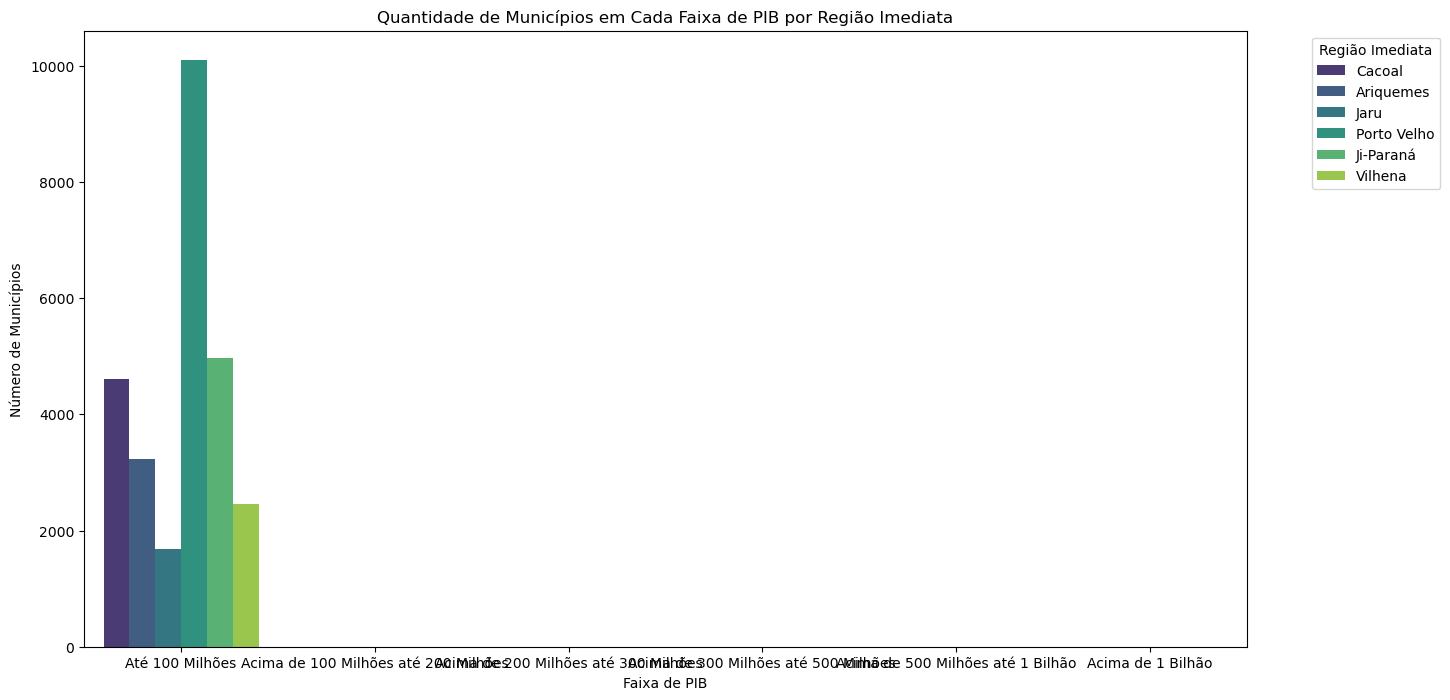

In [130]:
bins_pib = [0, 100000000, 200000000, 300000000, 500000000, 1000000000, float('inf')]
labels_pib = ['Até 100 Milhões', 'Acima de 100 Milhões até 200 Milhões', 'Acima de 200 Milhões até 300 Milhões', 'Acima de 300 Milhões até 500 Milhões', 'Acima de 500 Milhões até 1 Bilhão', 'Acima de 1 Bilhão']
df_1['PIB_Faixa'] = pd.cut(df_1['munResNome'].map(pib), bins=bins_pib, labels=labels_pib, include_lowest=True)

# Plotando o número de municípios em cada faixa de PIB por região imediata
plt.figure(figsize=(15, 8))
sns.countplot(x='PIB_Faixa', hue='RegiaoImediata', data=df_1, palette='viridis')
plt.title('Quantidade de Municípios em Cada Faixa de PIB por Região Imediata')
plt.xlabel('Faixa de PIB')
plt.ylabel('Número de Municípios')
plt.legend(title='Região Imediata', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

As mães tendem a ser mais jovens (menos de 17 anos) nas regiões com menor IDH e IFDM.
Além disso, mães mais jovens tendem a ter a escolaridade prejudicada.
Se considerarmos a ausência de dados paternos como ausência paterna, mães jovens e com menos escolaridade também tendem a serem vítimas desse problema.